### **Librerias**

In [0]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import  Axes3D
from sklearn.datasets import make_regression 

## **LLenado de vectores y calculo de la pendiente y regresion**

In [0]:
_X,_Y=make_regression(n_samples=200,n_features=2,n_targets=1,tail_strength=0.4,effective_rank=1)

In [0]:
a=len(_X)
_x=np.array(_X[:,0])
_x=np.array([np.ones(a),_x]).T
x1=_x[:,1]

In [0]:
B=np.linalg.inv(_x.T@_x)@(_x.T)@_Y
print("nuestra recta: ",B[0],"+",B[1],"X")

nuestra recta:  -0.5996171003305724 + 14.673042861890096 X


### **Creación de Funciones**

In [0]:
def PreHipotesis(w,z,_x):
    H1=w+z*x1
    return H1  
#################################################          
def func(z):
    fun=1/(1+np.exp(z))
    return fun
##################################################       
def error(w,z):
    sum=0
    H1=np.zeros(a)
    target=np.zeros(a)
    Logistic=np.zeros(a)
    for i in range(a):
        H1[i]=PreHipotesis(w,z,_x[i])
    for i in range(a):
        Logistic[i]=func(H1[i])
        target[i]=func(_Y[i])

    for i in range(a):
        sum+=(Logistic[i]-target[i])**2
    f=(1/(2*100))*sum
    return f    

###################################################   esta funcion no se esta simulando la que se esta simulando es  error que esta debajo
## para utilizarlo baSTA CONAGRTEGARLE O QUITARLE AL SIGUIENTE CARPETA UNA DE LAS 3 FUNCIONES
def error2(w,z):
    sum=0
    H1=np.zeros(a)
    target=np.zeros(a)
    Logistic=np.zeros(a)
    for i in range(a):
        H1[i]=PreHipotesis(w,z,_x[i])
    for i in range(a):
        Logistic[i]=func(H1[i])
        target[i]=func(_Y[i])

    for i in range(a):
        sum+=(target[i]*np.log10(Logistic[i])+(1-target[i])*np.log10(1-Logistic[i]))**2
    f=(1/(a))*sum
    return f 

### **Uso de las Funciones**

In [0]:

B0=np.linspace(-B[0],B[0],a) #particionamos nuestra función en 100 donde esos valores seran utlizados como puntops de nuestra grafica
B1=np.linspace(-B[1],B[1],a)
_z=np.zeros((a,a)) ## matriz de ceros
for ix,x1 in enumerate(B0):
    for iy,y1 in enumerate(B1):
        _z[iy,ix]=error(x1,y1)


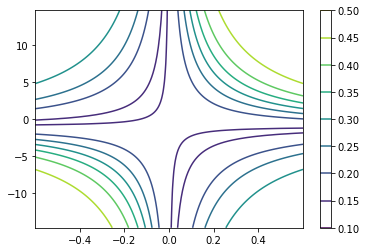

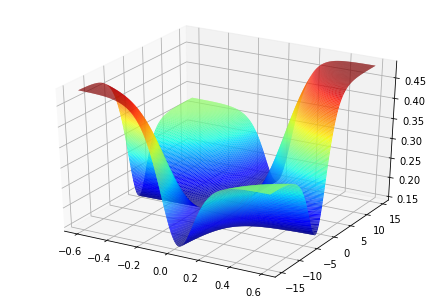

In [0]:
plt.contour(B0,B1,_z)
plt.colorbar()
fig = plt.figure()
ax = Axes3D(fig)
X ,Y = np.meshgrid(B0,B1)
ax.plot_surface(X,Y,_z,rstride=1,cstride=1,cmap='jet')

In [0]:
'''def error1(w,z):###prueba

    sum=0
    H1=np.zeros(a)
    target=np.zeros(a)
    Logistic=np.zeros(a)
    for i in range(a):
        H1[i]=PreHipotesis(w,z,_x[i])
    for i in range(a):
        Logistic[i]=func(H1[i])
        target[i]=func(_Y[i])

    for i in range(a):
        sum+=(_Y[i]*np.log10(Logistic[i])+(1-_Y[i])*np.log10(1-Logistic[i]))**2
    f=(1/(a))*sum
    return f    
'''

'def error1(w,z):###prueba\n\n    sum=0\n    H1=np.zeros(a)\n    target=np.zeros(a)\n    Logistic=np.zeros(a)\n    for i in range(a):\n        H1[i]=PreHipotesis(w,z,_x[i])\n    for i in range(a):\n        Logistic[i]=func(H1[i])\n        target[i]=func(_Y[i])\n\n    for i in range(a):\n        sum+=(_Y[i]*np.log10(Logistic[i])+(1-_Y[i])*np.log10(1-Logistic[i]))**2\n    f=(1/(a))*sum\n    return f    \n'

[-0.0019637  -0.00274504]


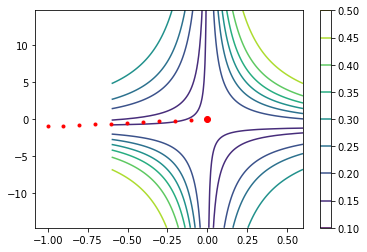

In [0]:
grad=np.zeros(2)
h=0.001
lr=0.001
theta=(np.random.rand(2)*0.002-1)
_T=np.copy(theta)
plt.contour(B0,B1,_z)
plt.colorbar()
for i in range(1000):
    for ix,x in enumerate(theta):
        _T[ix]=_T[ix]+h
        deri=(func(_T)-func(theta))/h
        grad=deri
    theta=theta-lr*grad 
    if i%100==0:
        plt.plot(theta[0],theta[1],".",c="red")  


plt.plot(theta[0],theta[1],"o",c="red")
print(theta)
plt.show()